# Populando um Banco de dados com Python

Uma atividade muito comun e util a muitas empresas é a alimentação ou população do banco de dados,
Os banco de dados podem armazenar informações importantes para a o processo de tomada de decisão em uma empresa, gerando insigth que facilitam identificar e compreender fatos que afetam direta ou indiretamente os negocios.

Popular ou povoar um banco de dados, pode ser um processo automatizado, desde que haja uma estrutura previamente modelada, para receber os dados. Aqui apresentaremos um script criado em python, para automatizar o processo.

Para essa atividade você vai precisar de um SGBD instalado em sua maquina, mo meu caso eu utilizo o MySQL. 

## Criando a modelagem de um banco de dados Relacional

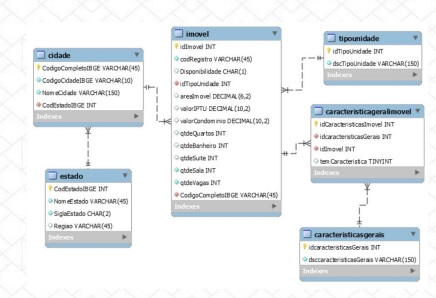

Para criar esse banco de dados uttilize o script abaixo.
execuntando no workbench, ou copiando e colando no prompt de comando.
porém não se esqueça que as Chaves Estrangeiras(fKs) devem ser criadas na hora da criação da tabela, ou a mesma, não será criada.


Para rodar o script com workbench copie o codigo e cole em umm editor de texto, puro e salve na extenção SQL, note que não é necessário acessar o modulo de script do python no MySQL.    

In [ ]:
-- MySQL Workbench Forward Engineering

-- -----------------------------------------------------
-- Schema empresaX
-- -----------------------------------------------------
CREATE SCHEMA IF NOT EXISTS `empresaX` DEFAULT CHARACTER SET utf8mb4;
USE `empresaX` ;

-- -----------------------------------------------------
-- Table `empresaX`.`caracteristicasgerais`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`caracteristicasgerais` (
  `idcaracteristicasGerais` INT NOT NULL AUTO_INCREMENT,
  `dsccaracteristicasGerais` VARCHAR(150) NOT NULL,
  PRIMARY KEY (`idcaracteristicasGerais`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8mb4
COLLATE = utf8mb4_0900_ai_ci;


-- -----------------------------------------------------
-- Table `empresaX`.`estado`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`estado` (
  `CodEstadoIBGE` INT NOT NULL,
  `NomeEstado` VARCHAR(45) NOT NULL,
  `SiglaEstado` CHAR(2) NOT NULL,
  `Regiao` VARCHAR(45) NULL DEFAULT NULL,
  PRIMARY KEY (`CodEstadoIBGE`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8;


-- -----------------------------------------------------
-- Table `empresaX`.`cidade`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`cidade` (
  `CodigoCompletoIBGE` VARCHAR(45) NOT NULL,
  `CodigoCidadeIBGE` VARCHAR(10) NOT NULL,
  `NomeCidade` VARCHAR(150) NOT NULL,
  `CodEstadoIBGE` INT NOT NULL,
  PRIMARY KEY (`CodigoCompletoIBGE`),
  INDEX `fk_Cidade_Estado_idx` (`CodEstadoIBGE` ASC),
  CONSTRAINT `fk_Cidade_Estado`
    FOREIGN KEY (`CodEstadoIBGE`)
    REFERENCES `empresaX`.`estado` (`CodEstadoIBGE`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8;


-- -----------------------------------------------------
-- Table `empresaX`.`tipounidade`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`tipounidade` (
  `idTipoUnidade` INT NOT NULL AUTO_INCREMENT,
  `dscTipoUnidade` VARCHAR(150) NOT NULL,
  PRIMARY KEY (`idTipoUnidade`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8;


-- -----------------------------------------------------
-- Table `empresaX`.`imovel`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`imovel` (
  `idImovel` INT NOT NULL AUTO_INCREMENT,
  `codRegistro` VARCHAR(45) NOT NULL,
  `Disponibilidade` CHAR(1) NULL DEFAULT NULL,
  `idTipoUnidade` INT NOT NULL,
  `areaImovel` DECIMAL(6,2) NULL DEFAULT NULL,
  `valorIPTU` DECIMAL(10,2) NULL DEFAULT NULL,
  `valorCondominio` DECIMAL(10,2) NULL DEFAULT NULL,
  `qtdeQuartos` INT NULL DEFAULT NULL,
  `qtdeBanheiro` INT NULL DEFAULT NULL,
  `qtdeSuite` INT NULL DEFAULT NULL,
  `qtdeSala` INT NOT NULL DEFAULT '1',
  `qtdeVagas` INT NOT NULL DEFAULT '0',
  `CodigoCompletoIBGE` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`idImovel`),
  INDEX `fk_Imovel_TipoUnidade_idx` (`idTipoUnidade` ASC),
  INDEX `fk_Imovel_Cidade1_idx` (`CodigoCompletoIBGE` ASC),
  CONSTRAINT `fk_Imovel_Cidade1`
    FOREIGN KEY (`CodigoCompletoIBGE`)
    REFERENCES `empresaX`.`cidade` (`CodigoCompletoIBGE`),
  CONSTRAINT `fk_Imovel_TipoUnidade`
    FOREIGN KEY (`idTipoUnidade`)
    REFERENCES `empresaX`.`tipounidade` (`idTipoUnidade`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8;


-- -----------------------------------------------------
-- Table `empresaX`.`caracteristicageralimovel`
-- -----------------------------------------------------
CREATE TABLE IF NOT EXISTS `empresaX`.`caracteristicageralimovel` (
  `idCaracteristicasImovel` INT NOT NULL AUTO_INCREMENT,
  `idcaracteristicasGerais` INT NOT NULL,
  `idImovel` INT NOT NULL,
  `temCaracteristica` TINYINT NULL DEFAULT NULL,
  PRIMARY KEY (`idCaracteristicasImovel`),
  INDEX `fk_caracteristicasGerais_has_Imovel_Imovel1_idx` (`idImovel` ASC),
  INDEX `fk_caracteristicasGerais_has_Imovel_caracteristicasGerais1_idx` (`idcaracteristicasGerais` ASC),
  CONSTRAINT `fk_caracteristicasGerais_has_Imovel_caracteristicasGerais1`
    FOREIGN KEY (`idcaracteristicasGerais`)
    REFERENCES `empresaX`.`caracteristicasgerais` (`idcaracteristicasGerais`),
  CONSTRAINT `fk_caracteristicasGerais_has_Imovel_Imovel1`
    FOREIGN KEY (`idImovel`)
    REFERENCES `empresaX`.`imovel` (`idImovel`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8mb4;

-- -----------------------------------------------------
-- Data for table `empresaX`.`tipounidade`
-- -----------------------------------------------------

USE `empresaX`;
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (1, 'Casa');
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (2, 'Casa geminada');
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (3, 'Apartamento tipo');
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (4, 'Apartamento cobertura');
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (5, 'Apartamento área privativa');
INSERT INTO `empresaX`.`tipounidade` (`idTipoUnidade`, `dscTipoUnidade`) VALUES (6, 'Flat');

COMMIT;



Após a criação do banco de dados, estaremos prontos para o script Python!!!

### Bora ali "Codar"!

# importando a Biblioteca

In [ ]:
import mysql.connector

### OBSERVAÇÃO
#### Antes de executar este notebook pela primeira vez, instale o pacote mysql.connector
Para instalar o pacote, utilizando o prompt do Anaconda, execute o comando abaixo:

#### !Pip install mysql-connector-python

#### Conectar ao MySQL Server sem selecionar um banco de dados

In [ ]:
mydb = mysql.connector.connect(
    host='localhost',
    user='Seu User Name',
    password='Digite Sua Senha Aqui'
)

print(mydb)

mycursor = mydb.cursor()


In [ ]:
#Retorna todos os esquemas criados no seu servidor de Banco de Dados
mycursor.execute("SHOW DATABASES") 

for db in mycursor:
    print(db)

#### Conectar ao MySQL Server selecionando um banco de dados específico

In [ ]:
mydb = mysql.connector.connect(
    host='localhost',
    user='Seu User Name',
    password='Digite Sua Senha Aqui',
    database='Seu database'
)

print(mydb)

mycursor = mydb.cursor()

In [1]:
#Retorna todas as tabelas criados no seu esquema de Banco de Dados 
mycursor.execute("SHOW TABLES")

for db in mycursor:
    print(db)

NameError: name 'mycursor' is not defined

**OBSERVAÇÃO:**

Caso o erro abaixo ocorra, em qualquer momento deste notebook, significa que sua conexão com o banco de dados foi fechada, devido ao tempo de timeout. Basta executar a conexão novamente e executar os comandos em seguida.

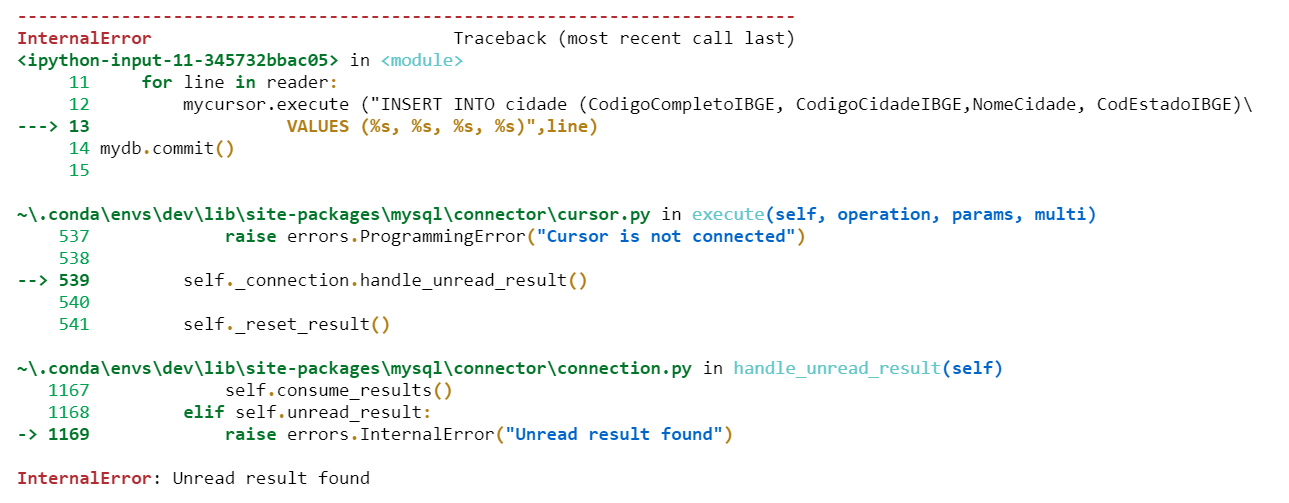

# Populando o Banco de Dados

### Agora que vimos o basico sobre conectar e descobrir / acessar as tabelas de um banco de dados, vamos tentar inserir registros apartir de arquivos de texto.


In [ ]:
# Vamos consultar a tabela tipo unidade e constatar que ela já possui alguns registros.

#Consultar a tabela tipounidade
mycursor.execute("SELECT * FROM tipounidade")
myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

# inserir um registro na tabela tipounidade
mycursor.execute("INSERT INTO tipounidade(idTipoUnidade,dscTipoUnidade) VALUES(7,'Loft');")
myresult = mycursor.fetchone() #apenas primeiro registro

print(myresult)

#Fazer a confirmação da inserção
mydb.commit()

**OBS 1:** Caso ocorra o erro: *Error: Duplicate entry '6' for key 'tipounidade.PRIMARY' [1062]*

Isso significa que você violou a chave primária, ou seja, tentou inserir uma chave que já existe. Confira o valor da chave que esta inserindo, altere, e execute novamente.

**OBS 2:** Caso ocorra o erro: *Error: Column count doesn't match value count at row 1 [1136]*
Isso significa que você esta inserindo dados não compatíveis com a definição da tabela.

In [ ]:
#inserir um  novo registro na tabela tipounidade

mycursor.execute("INSERT INTO tipounidade(idTipoUnidade, dscTipoUnidade) VALUES(8,'Chácara')")
myresult = mycursor.fetchone() #apenas primeiro registro

print(myresult)

### Agora vamos usar um  arquivo CSV para incluir registros,
#### Precisaremos importar a biblioteca CSV do Python para ler o arquivo,
#### para simplificar usarei a biblioteca padrão do python para ler o arquivo de texto ao invés de usar o Pandas.

In [ ]:
import csv

In [ ]:
# armazenamos uma variavél com o caminho do arquivo
filename  = "C:/Bootcamp/Datasets/XLS/estados.csv"


#Abrir arquivo e inserir cada linha do arquivo na tabela estados

with open(filename, 'r') as incsvfile:
    reader = csv.reader(incsvfile, delimiter=',')
    next(reader, None)  # pula os headers
    for line in reader:
        # armazenamos a query em uma variavel, que se repetirá para cada linha lida
        sql = "INSERT INTO estado (CodEstadoIBGE,NomeEstado,SiglaEstado,Regiao) VALUES (%s, %s, %s,%s)"
        # executa a query
        mycursor.execute(sql, line)
        
    #confirma a inserção    
    mydb.commit()
    incsvfile.close() #Fechar arquivo

In [ ]:
#Consultar a tabela estados para confirmar a inserção
mycursor.execute("SELECT * FROM estados")
myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

In [ ]:
# popular a tabela caracteristicasgerais da mesma maneira que a tabela anterior

filename  = "C:/Bootcamp/Datasets/CSV/caracteristicasgerais.csv"
sql = "INSERT INTO caracteristicasgerais (idcaracteristicasGerais,dsccaracteristicasGerais) VALUES (%s, %s)"
with open(filename, 'r') as incsvfile:
    reader = csv.reader(incsvfile, delimiter=',')
    next(reader, None)
    for line in reader:
        mycursor.execute(sql, line)
        
        
mydb.commit()
incsvfile.close()    
mycursor.execute("SELECT * FROM estados")
myresult = mycursor.fetchall() 

for mydata in myresult:
    print(mydata)

#### Outros exemplos de  metodos para execução de Query para INSERT

In [ ]:
# Inserir dados em uma tabela

query = "INSERT INTO caracteristicasgerais (idcaracteristicasGerais, dsccaracteristicasGerais) VALUES (%s, %s)"
values = (1, "Portaria 24 horas")

mycursor.execute(query, values)

#Fazer a confirmação da inserção
mydb.commit()

print(mycursor.rowcount, "registro(s) inserido(s).")

#Inserindo multiplos valores
values = [(2, "Elevador"),(3,"Piscina")]

mycursor.executemany(query, values)

mydb.commit()

print(mycursor.rowcount, "registro(s) inserido(s).")

#Consultar a tabela para verificar a inserção

mycursor.execute("SELECT * FROM caracteristicasgerais")

myresult = mycursor.fetchall() #todos os registros

for mydata in myresult:
    print(mydata)

Selecionando apenas o primeiro registro de uma tabela

In [ ]:
mycursor.execute("SELECT idcaracteristicasGerais, dsccaracteristicasGerais FROM caracteristicasgerais")

myresult = mycursor.fetchone() #apenas primeiro registro

print(myresult)

In [ ]:
#populando a tabela cidades

filename = 'C:\Bootcamp\Datasets\CSV\cidades.csv'
sql = "INSERT INTO cidade (CodigoCompletoIBGE, CodigoCidadeIBGE,NomeCidade, CodEstadoIBGE) VALUES (%s, %s, %s, %s)"
with open(filename, 'r') as incsvfile:
    reader = csv.reader(incsvfile, delimiter=',')
    next(reader, None)  # skip the headers
    for line in reader:
        mycursor.execute (sql,line)        
mydb.commit()
incsvfile.close() 


In [ ]:
#Consutar a tabela cidade listando a quantidade de registros existentes nela. Seu resultado deve imprimir 5570.

mycursor.execute("SELECT count(*) FROM cidade")

myresult = mycursor.fetchone()

print(myresult)

In [ ]:
filename = 'C:\Bootcamp\Datasets\CSV\caracteristicageralimovel.csv'
sql = "INSERT INTO caracteristicageralimovel(idcaracteristicasGerais, idImovel, temCaracteristica) VALUES (%s, %s, %s)"
with open(filename, 'r') as incsvfile:
    reader = csv.reader(incsvfile, delimiter=',')
    next(reader, None)
    mycursor.execute("SET FOREIGN_KEY_CHECKS = 0;")
    for line in reader:
        mycursor.execute(sql, line)
mydb.commit()
incsvfile.close()


In [ ]:
mycursor.execute("SELECT * FROM caracteristicageralimovel")
myresult = mycursor.fetchall() 
for mydata in myresult:
    print(mydata)